# Iris dataset exercise
#### Gustavo Hinestrosa, PhD<br><br>Below we will follow a supervised and an unsupervised for clustering and assess the results for each method

In [1]:
import numpy as np
import pandas as pd

from sklearn import metrics, neighbors, grid_search, cross_validation as cv
from sklearn import model_selection 
from sklearn import cluster
from sklearn.datasets import load_iris
from sklearn.cluster import ward_tree

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline


/Users/Tavo/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Tavo/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Read in Iris dataset and change from dictionary to pandas Data Frame

In [2]:
iris_data = load_iris() 
iris_names = pd.DataFrame(iris_data['feature_names'])
iris_names = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w']

iris_features = pd.DataFrame(iris_data['data'], columns=iris_names)
iris_target = pd.DataFrame(iris_data['target'], columns=['species'])
iris_species = pd.DataFrame(iris_data['target_names'])

iris = pd.concat([iris_features, iris_target], axis=1)

### Basic data exploration

In [3]:
iris.head()

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris.describe()

,sepal_l,sepal_w,petal_l,petal_w,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
iris.isnull().sum() #No null values, yey

sepal_l    0
sepal_w    0
petal_l    0
petal_w    0
species    0
dtype: int64

In [6]:
iris.species.value_counts() #We have 50 samples of each species

2    50
1    50
0    50
Name: species, dtype: int64

### Some more data explo and viz

In [7]:
# Look for differences between species
iris.groupby('species').mean()
#Let's flag potential overlapping of values... but only as initial indication... 
#we need the variance and the visualisations too!

,sepal_l,sepal_w,petal_l,petal_w
species,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [8]:
# Look for differences between species
iris.groupby('species').describe() 

petal_l    petal_w    sepal_l    sepal_w
species                                                  
0       count  50.000000  50.000000  50.000000  50.000000
        mean    1.464000   0.244000   5.006000   3.418000
        std     0.173511   0.107210   0.352490   0.381024
        min     1.000000   0.100000   4.300000   2.300000
        25%     1.400000   0.200000   4.800000   3.125000
        50%     1.500000   0.200000   5.000000   3.400000
        75%     1.575000   0.300000   5.200000   3.675000
        max     1.900000   0.600000   5.800000   4.400000
1       count  50.000000  50.000000  50.000000  50.000000
        mean    4.260000   1.326000   5.936000   2.770000
        std     0.469911   0.197753   0.516171   0.313798
        min     3.000000   1.000000   4.900000   2.000000
        25%     4.000000   1.200000   5.600000   2.525000
        50%     4.350000   1.300000   5.900000   2.800000
        75%     4.600000   1.500000   6.300000   3.000000
        max     5.100000   1.800000   7.000000   3.400000
2       count  50.000000  50.000000  50.000000  50.000000
        mean    5.552000   2.026000   6.588000   2.974000
        std     0.551895   0.274650   0.635880   0.322497
        min     4.500000   1.400000   4.900000   2.200000
        25%     5.100000   1.800000   6.225000   2.800000
        50%     5.550000   2.000000   6.500000   3.000000
        75%     5.875000   2.300000   6.900000   3.175000
        max     6.900000   2.500000   7.900000   3.800000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1152077b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115405470>]], dtype=object)

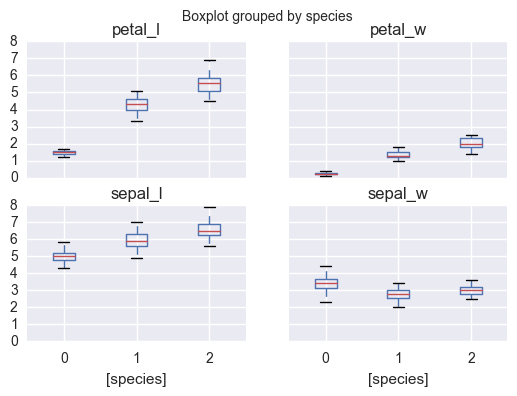

In [9]:
# Box plot of all numeric columns grouped by species
iris.boxplot(by='species') 
#Notice the increased overlap of values between species for sepal width
#to a lesser degree on sepal length.
#Species 1 and 2 overlap more among them than with species 0, indicating that their resulting clusters will be less dissimilar



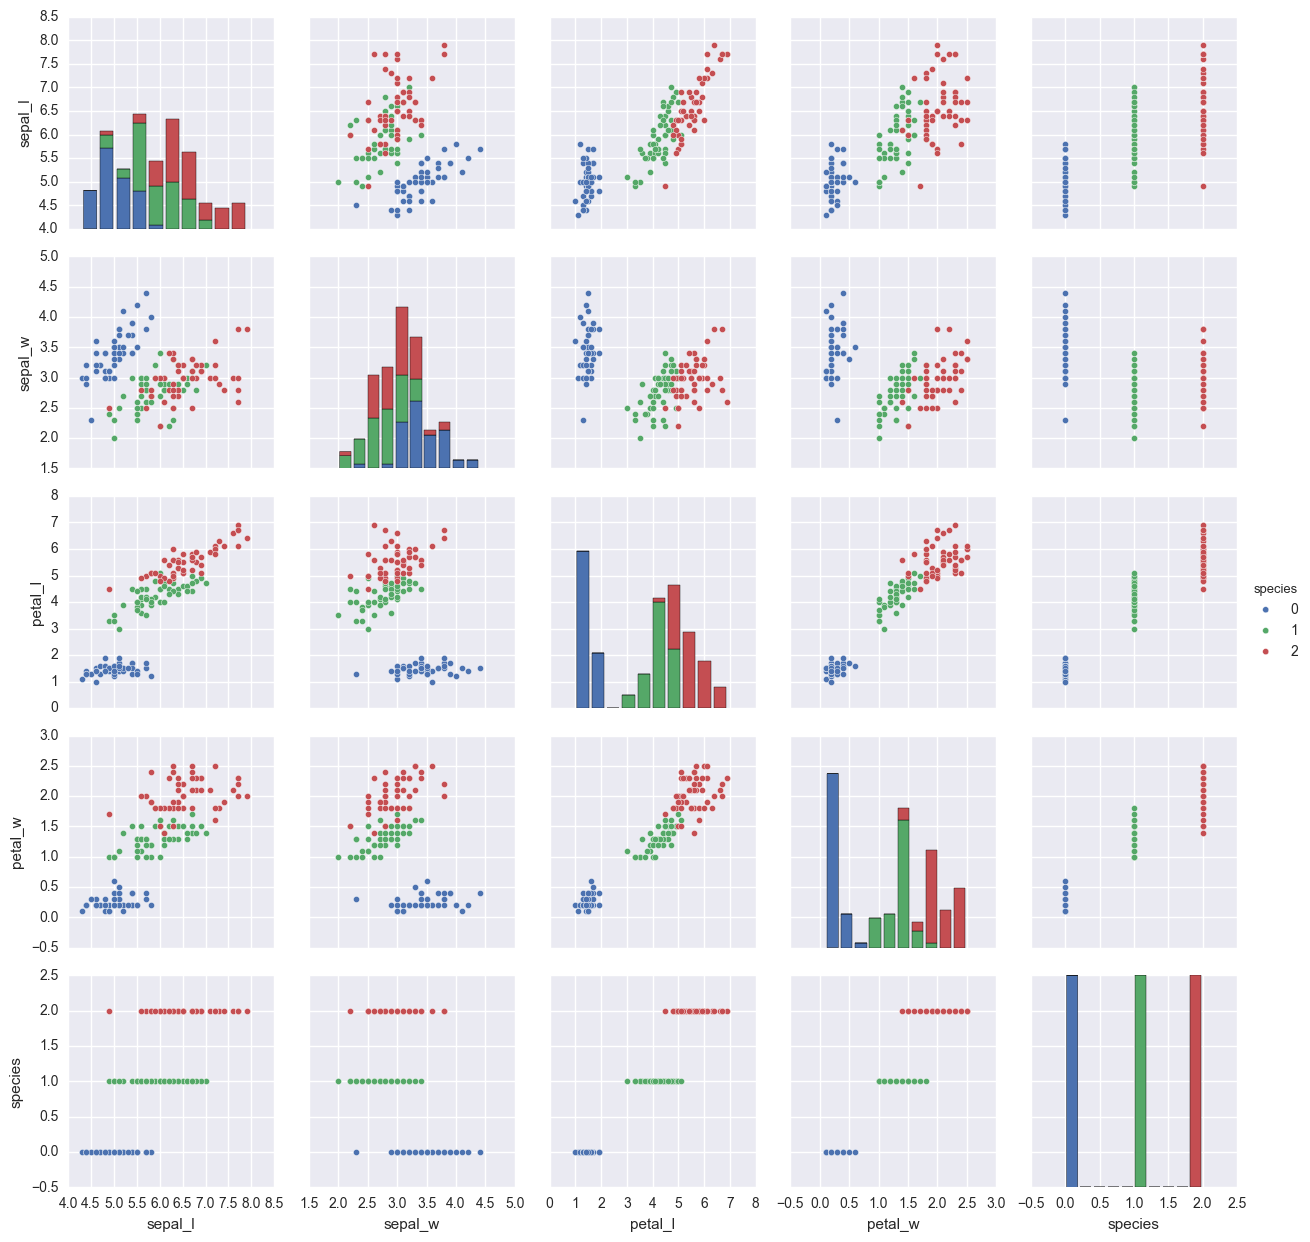

In [10]:
# Scatter matrix of all predictors coloured by species
sns.pairplot(iris, hue='species') 
#We confirm our preliminary observations in this graph
#And also realise that petal length and width are linearly correlated, rather strongly. 
#we could potentially reduce the dimensions of our data, but let's stick to the full columns for now

/Users/Tavo/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


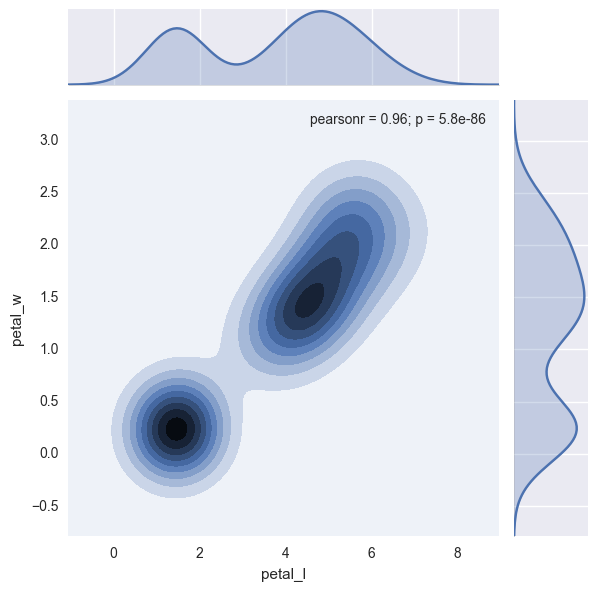

In [11]:
# Scatter plot of petal length versus petal width with density estimates
sns.jointplot(x='petal_l', y='petal_w', data=iris, kind='kde')
#As mentioned above, the petal length and width are strongly correlated and could potentially be 

In [12]:
# Define new predictor (petal area) in case we want to reduce the dimensions
iris['petal_a'] = iris.petal_l * iris.petal_w

# Look for differences in petal area between species
iris.groupby('species').petal_a.describe().unstack()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
0,50.0,0.3628,0.183248,0.11,0.2650,0.300,0.42,0.96
1,50.0,5.7204,1.368403,3.30,4.8600,5.615,6.75,8.64
2,50.0,11.2962,2.157412,7.50,9.7175,11.445,12.79,15.87


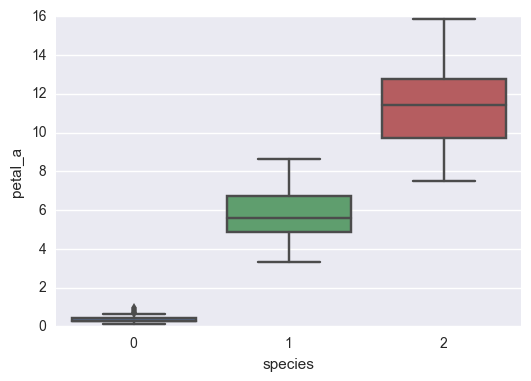

In [13]:
# Box plot of petal area by species
sns.boxplot(x='species', y='petal_a', data=iris)
#As expected, similar behaviour observed: some overlapping in species 1 and 2, no overlapping in species 0.
#We should use this new measure when visually assessing the clustering (usually not as easy in N-dimensions!)

### Clustering (supervised)
#### From the crossplots we can see that the data can be categorised in more than one dimension, which should allow us to create N-dimensional clusters.<br> As we know the categories (species) and we know they are three, we can apply a K-neighbours algorithm, but let's check the performance of a few algorithms, anyways... <br> I usually do two stages for testing: (1) I select a few algorithms with 'reasonable' parameters using a single function and then (2) I select the best performing algorithm and perform gridsearch to select the final parameters

In [14]:
iris.head()

,sepal_l,sepal_w,petal_l,petal_w,species,petal_a
0,5.1,3.5,1.4,0.2,0,0.28
1,4.9,3.0,1.4,0.2,0,0.28
2,4.7,3.2,1.3,0.2,0,0.26
3,4.6,3.1,1.5,0.2,0,0.30
4,5.0,3.6,1.4,0.2,0,0.28


#### We can now do some cross validation and define a function so we can test several variations of our algorithms in one go.<br>This would save some time 

In [15]:
#This are the subsets for the crossvalidation
kf = cv.StratifiedKFold(iris.species, n_folds=5, shuffle=True)

In [16]:
def check_classifiers(X, y):
    #Returns a sorted list of accuracy scores from fitting and scoring passed data
    #against several algorithms.
    
    _cv = kf
    classifier_score = {}
    
    scores = cv.cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=5, p=3), X, y)
    classifier_score['KNeighborsClassifier1'] = scores.mean()
    
    scores =  cv.cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=3, p=1), X, y)
    classifier_score['KNeighborsClassifier2'] = scores.mean()
    
    scores =  cv.cross_val_score(neighbors.RadiusNeighborsClassifier(weights='uniform'), X, y)
    classifier_score['RadiusNeighborsClassifier1'] = scores.mean()
    
    scores =  cv.cross_val_score(neighbors.RadiusNeighborsClassifier(weights='distance'), X, y)
    classifier_score['RadiusNeighborsClassifier2'] = scores.mean()
    
    return sorted(classifier_score.items(), reverse=True)

#We could copy paste as many variations as we want and we would get metrics for all these options very quickly.


In [17]:
X = iris.iloc[:,0:4]
y = iris.species
check_classifiers(X, y)

[('RadiusNeighborsClassifier2', 0.97344771241830064),
 ('RadiusNeighborsClassifier1', 0.96037581699346397),
 ('KNeighborsClassifier2', 0.97385620915032678),
 ('KNeighborsClassifier1', 0.98692810457516345)]

#### It seems that the K-neighbours classifier, changing the power parameter of the Minkowski metric (distance) improves our results and we get to an accuracy of almost 99%
#### Let's optimise our results anyways and run a grid search on the K-neighbour classifier

In [18]:
# Determine ‘optimal’ number of neighbours and method
params = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': np.arange(2, 50),
    'p' : [1, 2, 3]
}

gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf
)
gs.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ..., 2 2], n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'p': [1, 2, 3], 'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

#### How accurate is the model?

In [19]:
#‘Best’ accuracy
gs.best_score_

0.9866666666666667

In [20]:
#‘Best’ model
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=3,
           weights='uniform')

#### Accuracy better detailed in the confusion matrix, with false positives and negatives...

In [21]:
gs.best_estimator_.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
# Confusion matrix and classification report of the optimal model
metrics.classification.confusion_matrix(y, gs.best_estimator_.predict(X))

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [23]:
# Confusion matrix and classification report of the optimal model
print(metrics.classification_report(y, gs.best_estimator_.predict(X)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.96      0.97        50
          2       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150



#### We can add a visualisation to understand the extent of the misclassification. In this small dataset is not critical, but in very large datasets, it can be useful to have a grid view allowing to identify the 'regions' with problems

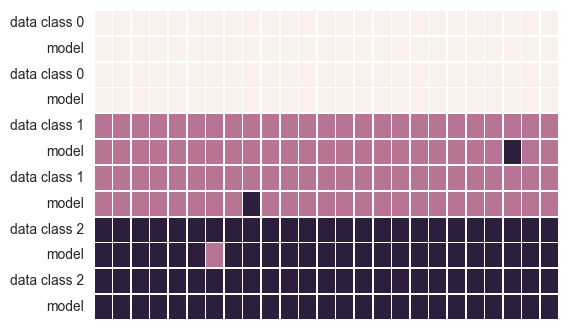

In [24]:
predictions = gs.best_estimator_.predict(X)
data = iris.species.values
pred_data = [data[0:25], predictions[0:25], data[25:50], predictions[25:50],
             data[50:75], predictions[50:75], data[75:100], predictions[75:100], 
             data[100:125],  predictions[100:125], data[125:150],  predictions[125:150]]
label_grid = ['data class 0','model']*2 + ['data class 1','model']*2 + ['data class 2','model']*2
ax = sns.heatmap(pred_data, xticklabels=False, yticklabels=label_grid, linewidth=.5, cbar=None)

In [25]:
['data class 0','model']*2, ['data class 0','model']*2

(['data class 0', 'model', 'data class 0', 'model'],
 ['data class 0', 'model', 'data class 0', 'model'])

#### We have trained a rather accurate model, which is ready to receive newly measured flowers. Needless to say, the quality of the predictions for these new samples will depend on the conformity of the measurements to the training set.

### Clustering (Unsupervised)
#### What if we don't have the species? We need to proceed with some unsupervised algorithm that would extract the structure in the data. Let's try it. With this small amount of data it is probably wise to apply a bottom-up approach, where we start with the single sample and start moving upward, agglomerating more and more samples in single clusters.

#### Let's start with a bottom-up approach (Agglomerative clustering). We will use 'fit_predict' to get labels for each class

In [26]:
model1 = cluster.AgglomerativeClustering(n_clusters=5).fit_predict(X)

In [27]:
model1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 4, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 4, 2, 3, 4, 4, 3, 1, 3, 4, 3, 4, 4, 4, 2, 2,
       4, 4, 3, 3, 2, 4, 2, 3, 2, 4, 3, 2, 2, 4, 3, 3, 3, 4, 2, 2, 3, 4, 4,
       2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2])

#### But how to know what is the ideal number of clusters that represents the data structure, with groups that have actual characteristics that differentiates them from the other groups?

#### The visual approach is a possibility. Trial an error. For example, let's get the graphs using 5 clusters

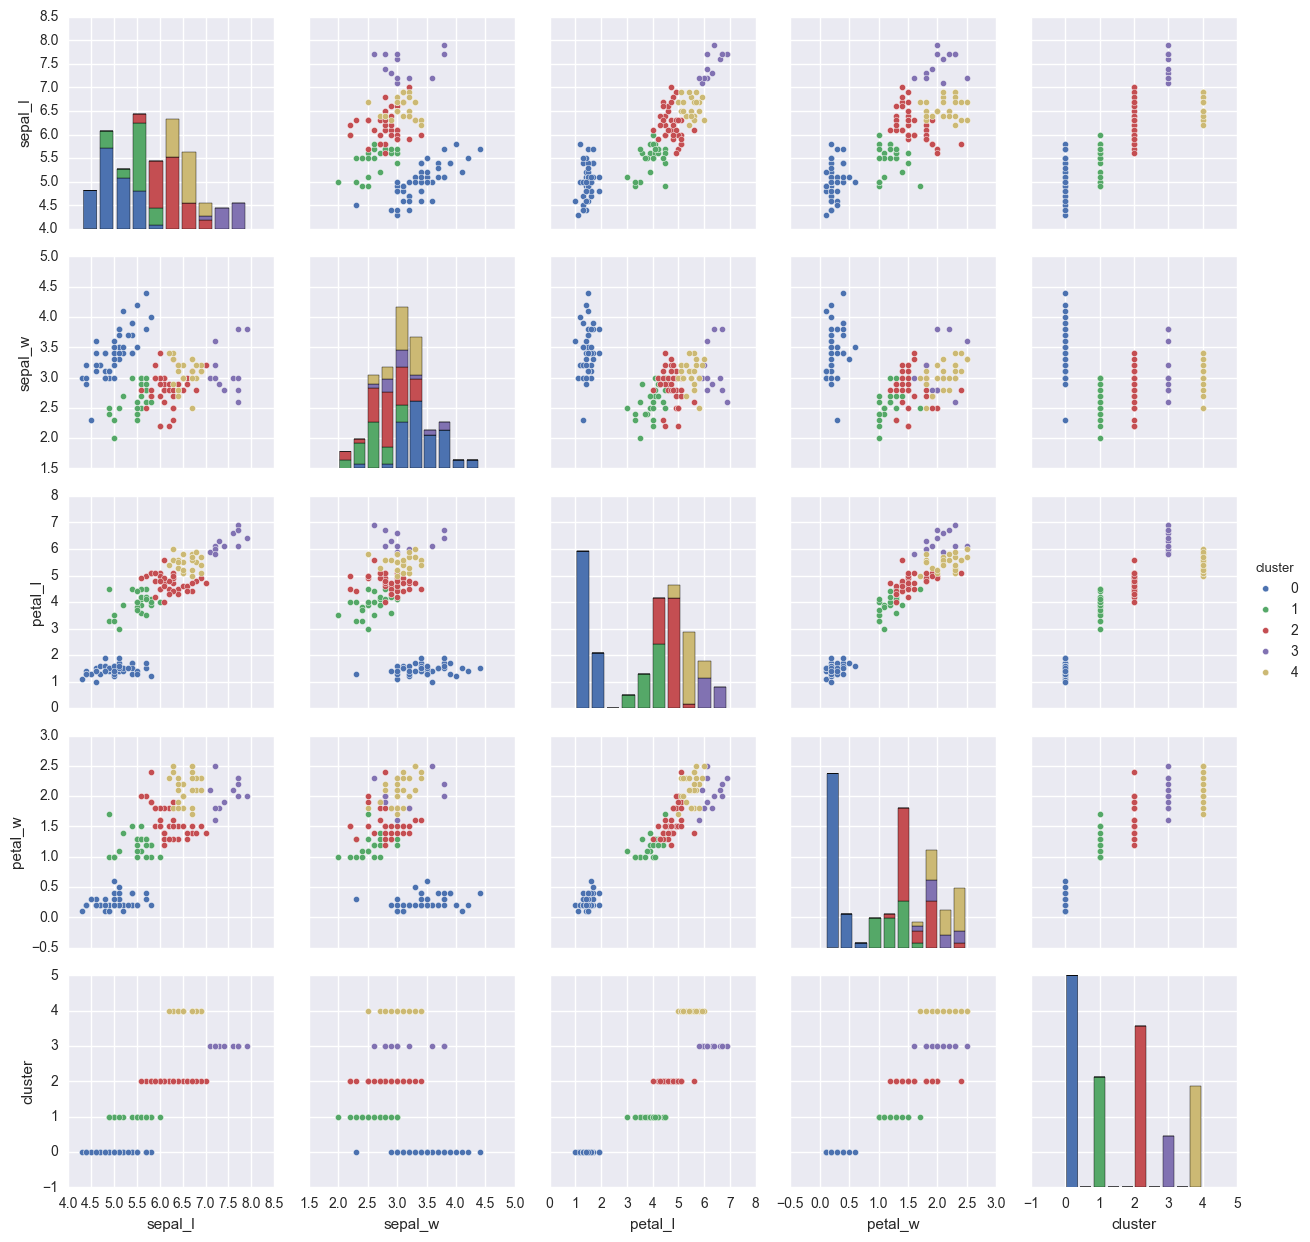

In [28]:
model2 = pd.DataFrame(model1, columns=['cluster'])
X_cluster = X.join(model2)
sns.pairplot(X_cluster, hue='cluster') 



#### Petal width, sepal width are poor discriminators. Groups overlap.
#### Petal length, sepal length by themselves seem to discriminate between groups
#### The key is then working in terms of variance, distances and cluster distances to come with an optimal number of classes

#### One way to understand the clustering is by making a Ward tree.<br>However, I will rather go another route, using the silhoutte scores

In [29]:
#cluster.ward_tree(model1)

#### From scikit learn website, let's adapt their code for silhouette extraction...

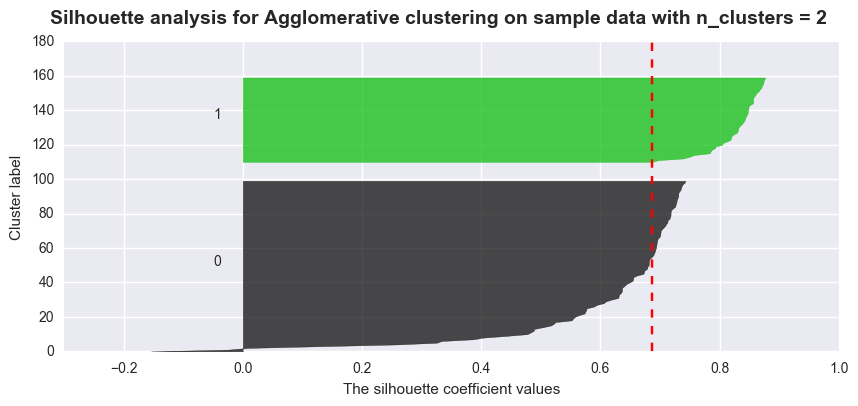

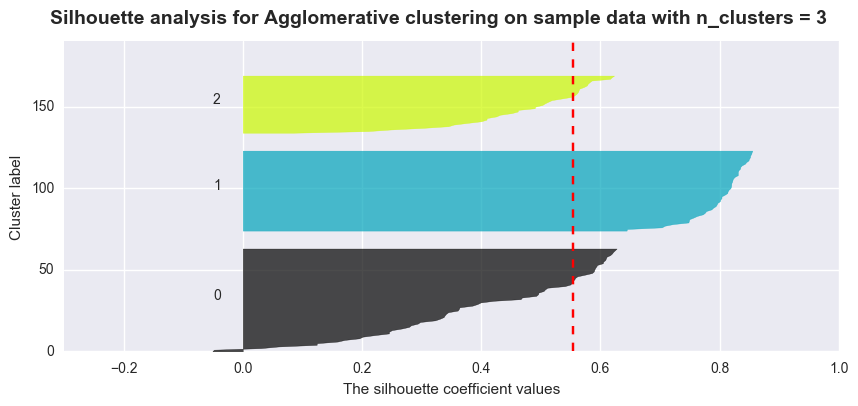

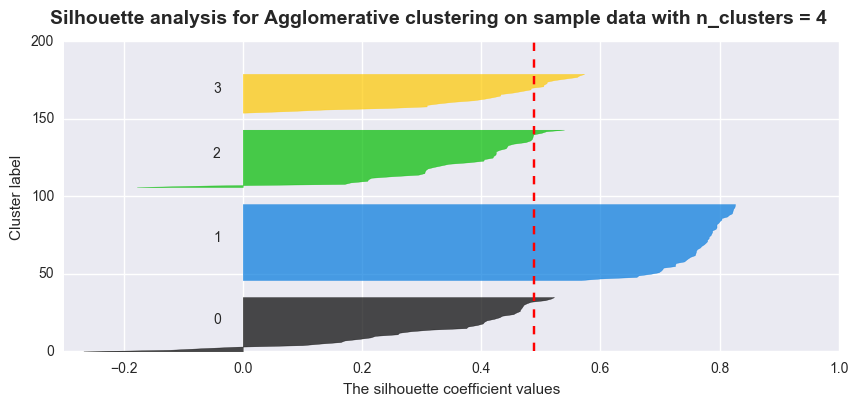

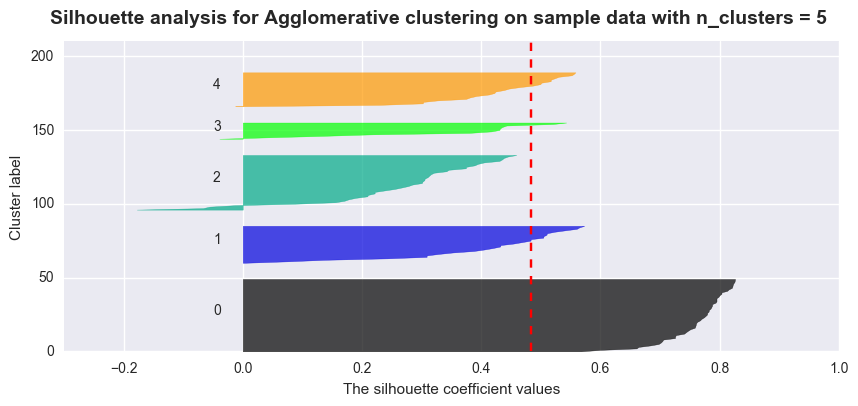

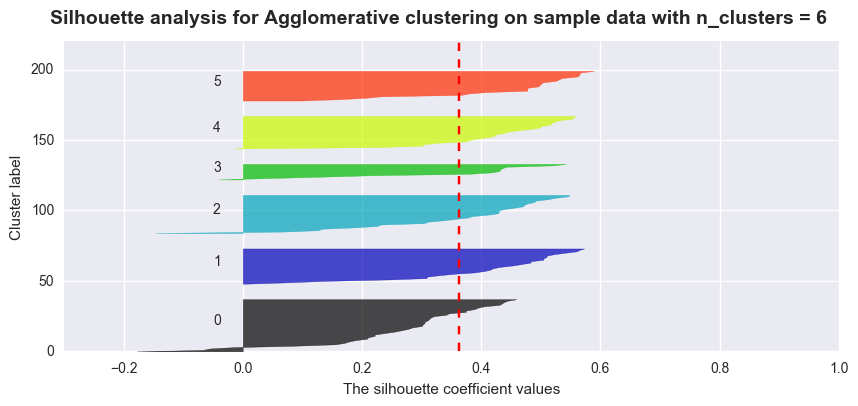

For n_cluster = 4 the silhouette score is 0.4887398491
For n_cluster = 3 the silhouette score is 0.554097290815
For n_cluster = 5 the silhouette score is 0.484155352624
For n_cluster = 2 the silhouette score is 0.686393054345
For n_cluster = 6 the silhouette score is 0.361884515226


In [30]:
range_n_clusters = [2, 3, 4, 5, 6]
Silhouscores = {}

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 4)
    # The plot is the silhouette plot
    ax1.set_xlim([-0.3, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value
    clusterer = cluster.AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    Silhouscores['For n_cluster = %d' % n_clusters] = silhouette_avg

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 0

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    #plt.set_yticks([])  # Clear the yaxis labels / ticks
    #plt.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for Agglomerative clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

for key, value in Silhouscores.items() :
    print(key, 'the silhouette score is', value)

#### Looking at the scores, we notice that the most optimal are for 2 and 3 classes. We know from the full dataset that the species versicolor and virginica overlap in some of the metrics, creating two major classes, one of which can be further divided to make a total of three classes.
#### Finally, we could compare the results of the unsupervised classification with our data.

In [31]:
model3 = cluster.AgglomerativeClustering(n_clusters=3).fit_predict(X)

In [32]:
model3 = model3+3
model3

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 3, 3,
       5, 5, 5, 5, 3, 5, 3, 5, 3, 5, 5, 3, 3, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5,
       3, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5, 3])

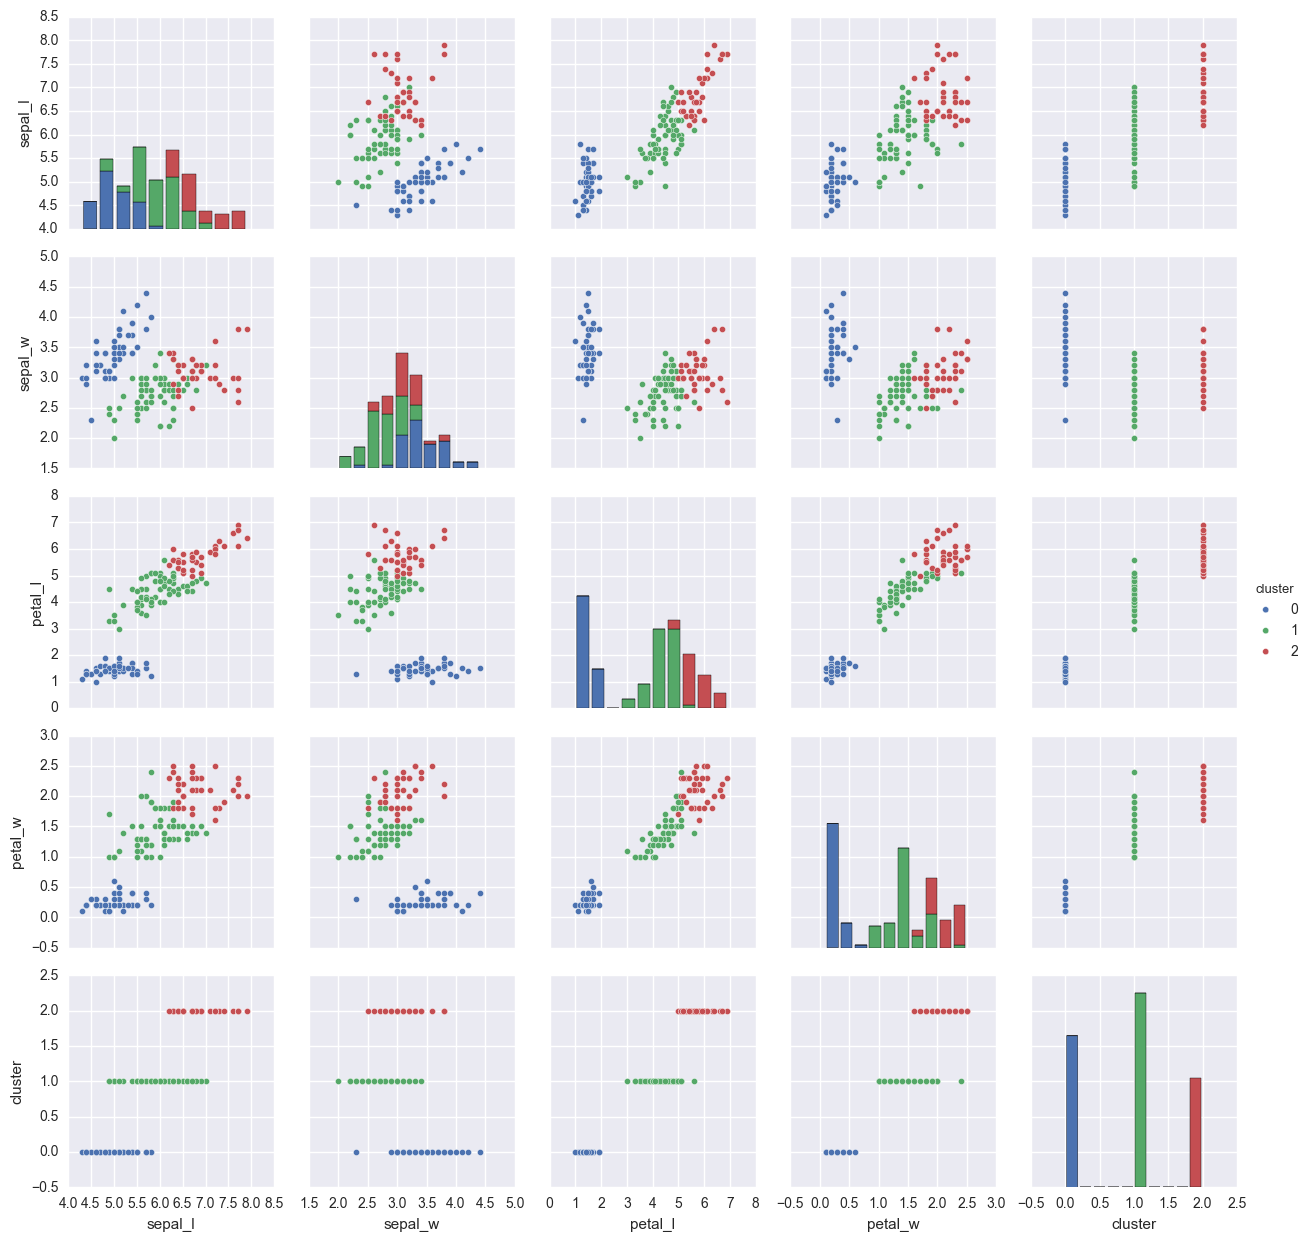

In [33]:
#We need to recode the classes! 

model3[model3==3] = 1
model3[model3==4] = 0
model3[model3==5] = 2

model4 = pd.DataFrame(model3, columns=['cluster'])
X_cluster2 = X.join(model4)
sns.pairplot(X_cluster2, hue='cluster') 



#### How accurate is the unsupervised classification?

In [34]:
metrics.accuracy_score(y, model3)

0.89333333333333331

#### And how many false positive and false negatives there are in our unsupervised model?

In [35]:
metrics.classification.confusion_matrix(y, model3)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0, 15, 35]])

#### Even without supervision, we manage to place correctly 90% of the samples.